## Plots
### Sensitivity to algorithm hyperparemeters (set $n$, $m$, $\sigma_p$, $\sigma_e$)
- e-greedy, x: $\epsilon$, y: rbo(p=0.5)
- ucb, x: $c$, y: rbo(p=0.5)
- elo, x: $K$, y: rbo(p=0.5)

### Sensitivity to env hyperparemeters
- e-greedy/ucb, x: $\sigma_p$, y: rbo(p=0.5)
- e-greedy/ucb, x: $\sigma_e$, y: rbo(p=0.5)
- e-greedy/ucb, x: $m$, y: rbo(p=0.5)
- e-greedy/ucb, x: $n$, y: rbo(p=0.5)

### Comparison to other methods (set $n$, $m$, $\sigma_p$, $\sigma_e$)
- e-greedy/ucb/elo, x: comparison num, y: 1st place accuracy
- e-greedy/ucb/elo, x: comparison num, y: 2st place accuracy
- e-greedy/ucb/elo, x: comparison num, y: 3st place accuracy
- e-greedy/ucb/elo, x: comparison num, y: 1st place in top 5
- e-greedy/ucb/elo, x: comparison num, y: 2st place in top 5
- e-greedy/ucb/elo, x: comparison num, y: 3st place in top 5
- e-greedy/ucb/elo, x: comparison num, y: rbo(p=0.5)
---

In [48]:
from ucb import UCB
from JudgingSimulator import JudgingSimulator
from epsilongreedy import EpsilonGreedy
from ELO import ELO
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from AbstractAlgo import ordinal_names
from types import SimpleNamespace as DotDict

n_episodes=100

### Sensitivity to algorithm hyperparemeters (set $n$, $m$, $\sigma_p$, $\sigma_e$)
- e-greedy, x: $\varepsilon$, y: rbo(p=0.5)
- ucb, x: $c$, y: rbo(p=0.5)
- elo, x: $K$, y: rbo(p=0.5)


In [102]:
n_teams = 15; n_judges = 1; opinion_var = 0.001; eval_var = 0.001; n_iter=50

In [103]:
true_q = np.linspace(0.05, 0.95, n_teams)
sim = JudgingSimulator(true_q, n_judges, opinion_var, eval_var)
n_iters = np.array([1, 5, 10, 50, 100])

In [104]:
ranges = dict(
    eps=[0, 0.1, 0.2, 0.5, 0.9, 1],
    c=[0.1, 1, 5, 10],
    k=[10, 20, 30, 40]
)
# plot accuracies instead of rbo
results = defaultdict(list)
for eps in ranges['eps']:
    experiment = EpsilonGreedy(sim, eps).run_experiment(n_episodes, top_n=-1, n_comparisons=n_iter)
    results['epg'].append(experiment)
for c in ranges['c']:
    experiment = UCB(sim, c).run_experiment(n_episodes, top_n=-1, n_comparisons=n_iter)
    results['ucb'].append(experiment)
for k in ranges['k']:
    experiment = ELO(sim, k).run_experiment(n_episodes=100, top_n=-1, n_comparisons=n_iter)
    results['elo'].append(experiment)

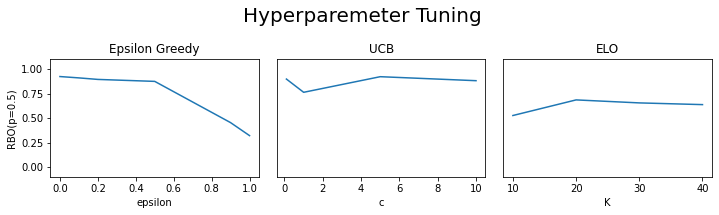

In [108]:
rbo = {algo: [result.rbo(0.5).mean() for result in results_] for algo, results_ in results.items()}

plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.plot(ranges['eps'], rbo['epg'])
plt.title('Epsilon Greedy')
plt.ylabel('RBO(p=0.5)')
plt.xlabel('epsilon')
plt.ylim(-0.1, 1.1)

plt.subplot(1, 3, 2)
plt.plot(ranges['c'], rbo['ucb'])
plt.title('UCB')
plt.xlabel('c')
plt.yticks([])
plt.ylim(-0.1, 1.1)

plt.subplot(1, 3, 3)
plt.plot(ranges['k'], rbo['elo'])
plt.title('ELO')
plt.xlabel('K')
plt.yticks([])
plt.ylim(-0.1, 1.1)

plt.suptitle('Hyperparemeter Tuning', fontsize=20)
plt.tight_layout()
plt.show()

### Sensitivity to env hyperparemeters
- e-greedy/ucb, x: $\sigma_p$, y: rbo(p=0.5)
- e-greedy/ucb, x: $\sigma_e$, y: rbo(p=0.5)
- e-greedy/ucb, x: $m$, y: rbo(p=0.5)
- e-greedy/ucb, x: $n$, y: rbo(p=0.5)

In [79]:
ranges = DotDict(
    n_teams=[5, 10, 15, 25, 30, 35, 40, 45, 50, 100],
    n_judges=[1, 2, 5, 10],
    opinion_var=[0.0001, 0.001, 0.01, 0.1],
    eval_var=[0.0001, 0.001, 0.01, 0.1]
)

const = DotDict(
    n_teams=15,
    n_judges=1,
    opinion_var=0.001,
    eval_var=0.001,
    n_iter = 50
)

algo_names = ['eps', 'ucb', 'elo']
algos = [EpsilonGreedy, UCB, ELO]
algo_param = [0.2, 1, 25]
results = defaultdict(lambda: defaultdict(list))
for n_teams in ranges.n_teams:
    sim = JudgingSimulator(np.linspace(0.05, 0.95, n_teams), const.n_judges, const.opinion_var, const.eval_var)
    for name, algo, param in zip(algo_names, algos, algo_param):
        experiment = algo(sim, param).run_experiment(n_episodes, top_n=-1, n_comparisons=const.n_iter)
        results['n_teams'][name].append(experiment)
for n_judges in ranges.n_judges:
    sim = JudgingSimulator(np.linspace(0.05, 0.95, const.n_teams), n_judges, const.opinion_var, const.eval_var)
    for name, algo, param in zip(algo_names, algos, algo_param):
        experiment = algo(sim, param).run_experiment(n_episodes, top_n=-1, n_comparisons=const.n_iter)
        results['n_judges'][name].append(experiment)
for opinion_var in ranges.opinion_var:
    sim = JudgingSimulator(np.linspace(0.05, 0.95, const.n_teams), const.n_judges, opinion_var, const.eval_var)
    for name, algo, param in zip(algo_names, algos, algo_param):
        experiment = algo(sim, param).run_experiment(n_episodes, top_n=-1, n_comparisons=const.n_iter)
        results['opinion_var'][name].append(experiment)
for eval_var in ranges.eval_var:
    sim = JudgingSimulator(np.linspace(0.05, 0.95, const.n_teams), const.n_judges, const.opinion_var, eval_var)
    for name, algo, param in zip(algo_names, algos, algo_param):
        experiment = algo(sim, param).run_experiment(n_episodes, top_n=-1, n_comparisons=const.n_iter)
        results['eval_var'][name].append(experiment)

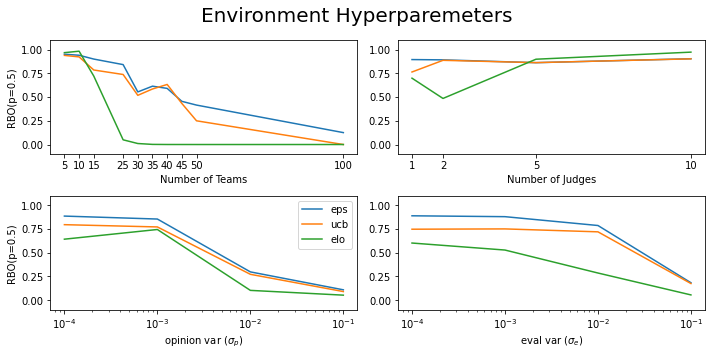

In [95]:
rbo = {env_var: np.array([[result.rbo(0.5).mean() for result in algo_results]
       for algo_results in var_results.values()]).T for env_var, var_results in results.items()}

plt.figure(figsize=(10, 5))
ax = plt.subplot(221)
plt.plot(ranges.n_teams, rbo['n_teams'])
# plt.title('Number of Teams')
plt.ylabel('RBO(p=0.5)')
plt.xlabel('Number of Teams')
plt.xticks(ranges.n_teams)
plt.ylim(-0.1, 1.1)

plt.subplot(222, sharey=ax)
plt.plot(ranges.n_judges, rbo['n_judges'])
# plt.title('Number of Judges')
plt.xlabel('Number of Judges')
plt.xticks(ranges.n_judges)
plt.ylim(-0.1, 1.1)


plt.subplot(223)
plt.plot(ranges.opinion_var, rbo['opinion_var'])
# plt.title('Opinion Variance')
plt.ylabel('RBO(p=0.5)')
plt.xlabel('opinion var ($\sigma_p$)')
plt.xticks(ranges.opinion_var)
plt.xscale('log')
plt.ylim(-0.1, 1.1)
plt.legend(algo_names, loc='upper right')


plt.subplot(224)
plt.plot(ranges.eval_var, rbo['eval_var'])
# plt.title('Evaluation Variance')
plt.xlabel('eval var ($\sigma_e$)')
plt.xticks(ranges.eval_var)
plt.xscale('log')
plt.ylim(-0.1, 1.1)

plt.suptitle('Environment Hyperparemeters', fontsize=20)
plt.tight_layout()
plt.show()

### Comparison to other methods (set $n$, $m$, $\sigma_t$, $\sigma_p$, $\sigma_e$)

In [54]:
n_teams = 15; n_judges = 1; opinion_var = 0.001; eval_var = 0.001

- e-greedy/ucb/elo/gavel, x: comparison num, y: place accuracy
- e-greedy/ucb/elo/gavel, x: comparison num, y: place in top 5
- e-greedy/ucb/elo/gavel, x: comparison num, y: rbo(p=0.5)

In [55]:
true_q = np.linspace(0.05, 0.95, n_teams)
sim = JudgingSimulator(true_q, n_judges, opinion_var, eval_var)
n_iters = np.array([1, 5, 10, 50, 100])
n_episodes = 100

In [56]:
results = defaultdict(list)
for n_iter in n_iters:
    experiment = EpsilonGreedy(sim, epsilon=0.1).run_experiment(n_episodes, top_n=-1, n_comparisons=n_iter)
    results['epg'].append(experiment)
    experiment = UCB(sim, c=1).run_experiment(n_episodes, top_n=-1, n_comparisons=n_iter)
    results['ucb'].append(experiment)
    experiment = ELO(sim).run_experiment(n_episodes=100, top_n=-1, n_comparisons=n_iter)
    results['elo'].append(experiment)

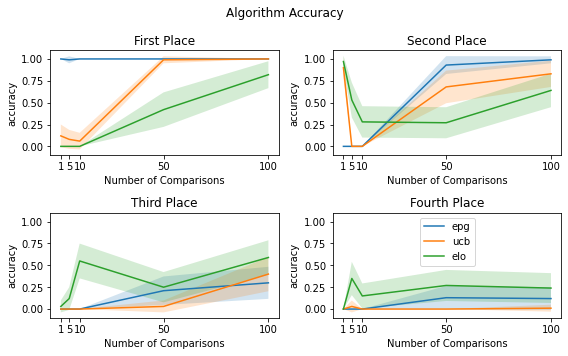

In [57]:
n_places = 4
grid=(2,2)
plt.figure(figsize=(8, 5))
for i in np.arange(n_places):
    ax = plt.subplot(2,2, i+1)
    for algo, results_ in results.items():
        mean = np.array([result.accuracies[:,i].mean() for result in results_])
        plt.plot(n_iters, mean, label=algo)
        std = np.array([result.accuracies[:,i].std() for result in results_])
        plt.fill_between(n_iters, mean-std*0.4, mean+std*0.4, alpha=0.2)

    plt.xticks(n_iters)
    plt.title(f'{ordinal_names[i].title()} Place')
    plt.ylabel('accuracy')
    plt.ylim(-0.1, 1.1)
    plt.xlabel('Number of Comparisons')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center')
plt.suptitle('Algorithm Accuracy')
plt.tight_layout()
plt.show()

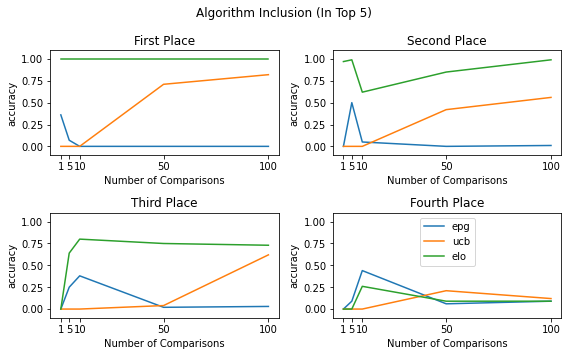

In [58]:
n_places = 4
grid=(2,2)
plt.figure(figsize=(8, 5))

for i in np.arange(n_places):
    ax = plt.subplot(2,2, i+1)
    for algo, results_ in results.items():
        mean = np.array([result.inclusions(3)[i] for result in results_])
        plt.plot(n_iters, mean, label=algo)

    plt.xticks(n_iters)
    plt.title(f'{ordinal_names[i].title()} Place')
    plt.ylabel('accuracy')
    plt.ylim(-0.1, 1.1)
    plt.xlabel('Number of Comparisons')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center')
plt.suptitle('Algorithm Inclusion (In Top 5)')
plt.tight_layout()
plt.show()

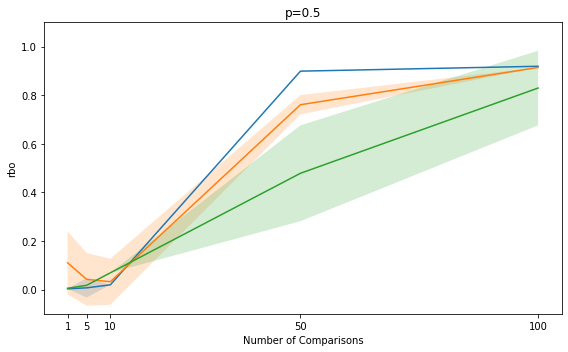

In [60]:
n_places = 4
grid=(2,2)
plt.figure(figsize=(8, 5))
i = 0
p=0.5
# for p in [0.3, 0.5, 0.7, 0.9]:
#     ax = plt.subplot(2,2, i+1)
for algo, results_ in results.items():
    mean = np.array([result.rbo(p=p).mean() for result in results_])
    plt.plot(n_iters, mean, label=algo)
    std = np.array([result.accuracies[:,i].std() for result in results_])
    plt.fill_between(n_iters, mean-std*0.4, mean+std*0.4, alpha=0.2)

plt.xticks(n_iters)
plt.title(f'Algorithm RBO')
plt.ylabel(f'RBO(p={p})')
plt.ylim(-0.1, 1.1)
plt.xlabel('Number of Comparisons')
i += 1

# handles, labels = ax.get_legend_handles_labels()
# plt.legend(handles, labels, loc='upper center')
# plt.suptitle('Algorithm RBO')
plt.tight_layout()
plt.show()